<a href="https://colab.research.google.com/github/thaque25/thaque25/blob/main/ML_on_EnergyEfficiency_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network
This machine learning solution examines the impact of input variables (relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution) on two output variables (heating load (HL) and cooling load (CL) of residential buildings. Regression is used to explore the relationship between the variables.


We will apply the following steps
*   Load the data from the CSV file
*   Visualize the data
*   Check for null values
*   Figure out the features and output
*   Train and test split
*   Scale the data
*   Create an instantiation of MLPRegressor - Multilayer Perceptron
*   Vary the number of neurons in the hidden layer
*   Try out more than 1 hidden layer




 **Loading Data**

In [ ]:
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving ENB2012_data.csv to ENB2012_data.csv


In [ ]:
# Convert the file into a Pandas dataframe
import pandas as pd
import io
datasetdf = pd.read_csv(io.BytesIO(uploaded['ENB2012_data.csv']))

**Visualizing the Data**

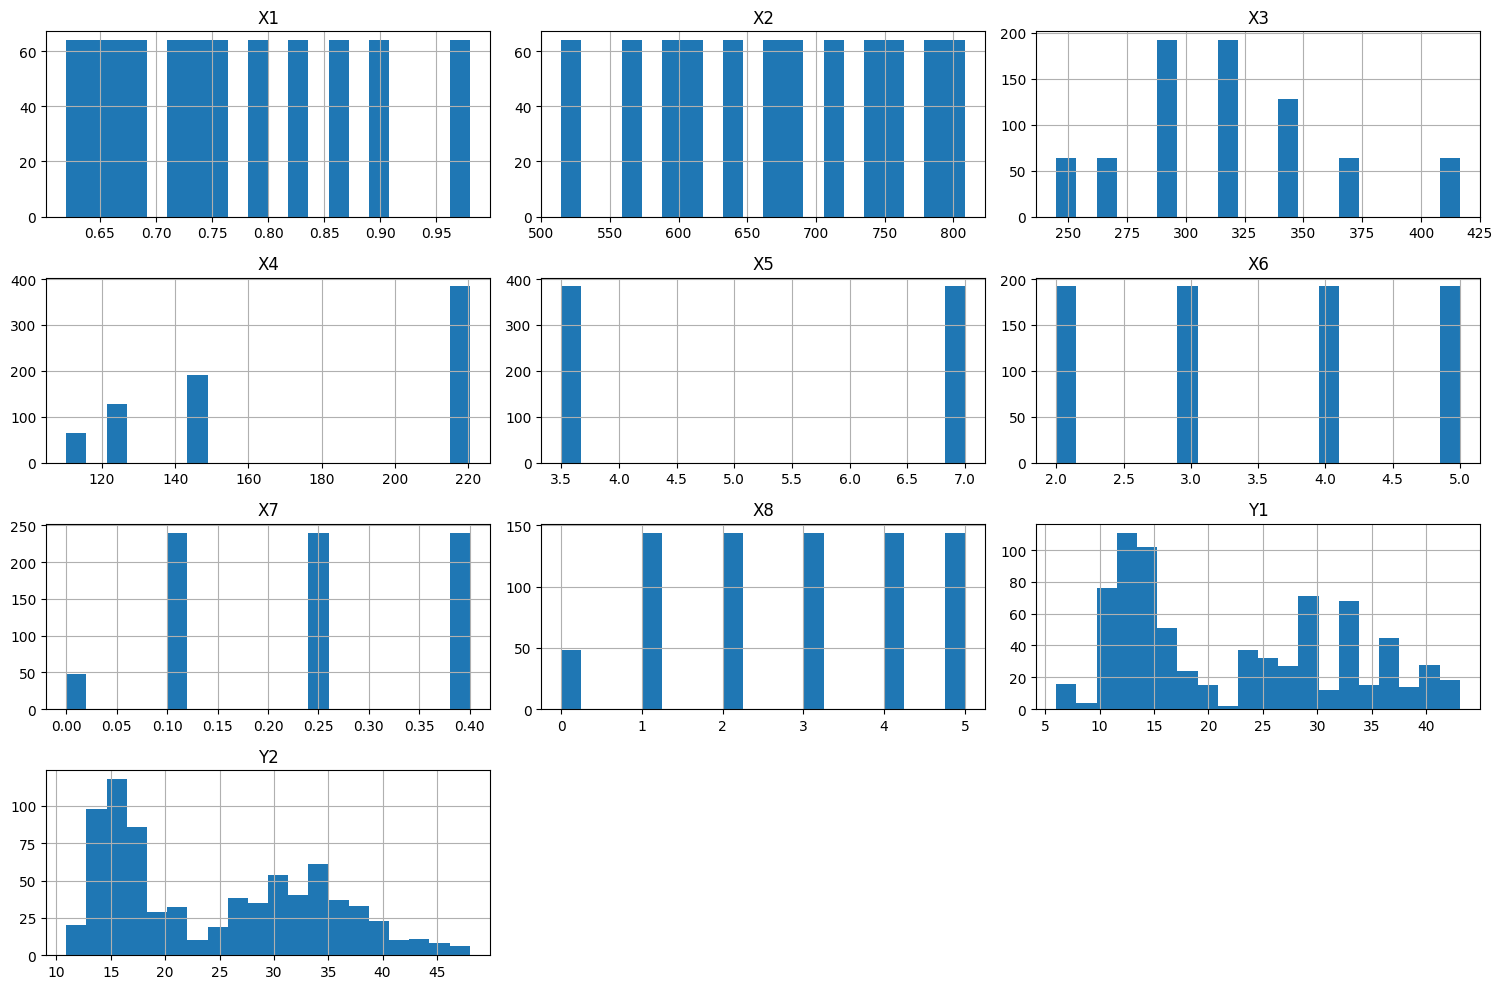

In [ ]:
# Create histograms to visualize the distribution of the features
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
# Plot histograms for all columns
datasetdf.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

**Checking the Data for Missing Values**

In [ ]:
# Let's sift through the code to check for any null values in the dataset
null_values = datasetdf.isnull().sum()
null_values

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

As can be seen above, there are no missing values in the dataset. Thus, we can continue with our analysis.

**Identifying Features and Labels**

In [ ]:
import numpy as np
import pandas as pd

# Split the data in test and train set
data = datasetdf.to_numpy()
xfeatures = data[:, :8]  # Features
y = data[:, 8:]          # Targets


**Feature Engineering**

Since I plan to use MLPRegressor (Neural Network Method), I am applying Min-Max scaling to all features, including those that already fall within the [0,1] range, to ensure consistency in scale across all input features. This should help in training a neural network that converges efficiently to a good solution.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Define columns to scale
columns_to_scale = [0, 1, 2, 3, 4, 6]

# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Apply scaling to the continuous features
xfeatures_scaled = np.copy(xfeatures)
xfeatures_scaled[:, columns_to_scale] = scaler.fit_transform(xfeatures[:, columns_to_scale])

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(xfeatures_scaled, y, train_size=0.8, random_state=15)

# Function to map X6 to radians
def map_x6_to_radians(x6_values):
    radian_mapping = {2: 0, 3: np.pi/2, 4: np.pi, 5: 3*np.pi/2}
    return np.vectorize(radian_mapping.get)(x6_values)

# Transform X6 values to radians, then to sine and cosine
X6_train_radians = map_x6_to_radians(xtrain[:, 5])
X6_test_radians = map_x6_to_radians(xtest[:, 5])

X6_train_sin = np.sin(X6_train_radians).reshape(-1, 1)
X6_train_cos = np.cos(X6_train_radians).reshape(-1, 1)
X6_test_sin = np.sin(X6_test_radians).reshape(-1, 1)
X6_test_cos = np.cos(X6_test_radians).reshape(-1, 1)

# Initialize OneHotEncoder and apply it to X8
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(xfeatures[:, [7]])  # Fit to the entire dataset to cover all possible categories in X8
X8_train_encoded = encoder.transform(xtrain[:, [7]])
X8_test_encoded = encoder.transform(xtest[:, [7]])

# Remove the original X6 and X8 columns
xtrain_scaled = np.delete(xtrain, [5, 7], axis=1)
xtest_scaled = np.delete(xtest, [5, 7], axis=1)

# Concatenate all features to form the final datasets
xtrain_final = np.concatenate([xtrain_scaled, X6_train_sin, X6_train_cos, X8_train_encoded], axis=1)
xtest_final = np.concatenate([xtest_scaled, X6_test_sin, X6_test_cos, X8_test_encoded], axis=1)

# Convert to DataFrames for easier inspection and manipulation
column_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'X6_sin', 'X6_cos'] + [f'X8_cat_{i}' for i in range(X8_train_encoded.shape[1])]
xtrain_final_df = pd.DataFrame(xtrain_final, columns=column_names)
xtest_final_df = pd.DataFrame(xtest_final, columns=column_names)

# Checking the final DataFrames
xtest_final_df.head()

,X1,X2,X3,X4,X5,X7,X6_sin,X6_cos,X8_cat_0,X8_cat_1,X8_cat_2,X8_cat_3,X8_cat_4,X8_cat_5
0,0.777778,0.166667,0.428571,0.111111,1.0,0.625,-1.000000e+00,-1.836970e-16,0.0,0.0,1.0,0.0,0.0,0.0
1,0.666667,0.250000,0.285714,0.333333,1.0,1.000,0.000000e+00,1.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0
2,0.333333,0.583333,0.000000,1.000000,0.0,0.250,1.000000e+00,6.123234e-17,0.0,1.0,0.0,0.0,0.0,0.0
3,0.555556,0.333333,0.428571,0.333333,1.0,0.250,1.224647e-16,-1.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0
4,0.388889,0.500000,1.000000,0.111111,1.0,1.000,1.000000e+00,6.123234e-17,0.0,0.0,0.0,0.0,0.0,1.0


We have successfully carried out min max scaling (normalization) on our independent variables (features) that were continuous. We didn't think that it was necessary for features, X6 and X8, as they were categorical data represented by an integer.

Looking at X6 and X8 values, they are integers with a limited range of distinct values, i.e., an indicator of categorical nature.

For X6, the sine and cosine transformations help to capture the cyclical nature of the data, ensuring that the model understands that after the highest value comes the lowest value, forming a cycle. The process involves converting the categorical data into two continuous features that represent the sine and cosine of the encoded angle, usually based on the number of categories.

X8 represents categorical data, corresponding to different types or configurations of glazing area. When the integers represent distinct, non-ordinal categories without any intrinsic order, X8 is a nominal categorical variable. In such cases, the appropriate course of action would be to use one-hot encoding to transform these categorical values into a binary matrix to prevent the machine learning model from assuming any numerical order or distance between the categories.


In [ ]:
# Initialize the MinMaxScaler
scaler_y = MinMaxScaler()

# Fit the scaler on the training target data
scaler_y.fit(ytrain)

# Transform both the training and test target data
ytrain_scaled = scaler_y.transform(ytrain)
ytest_scaled = scaler_y.transform(ytest)

The labels also need to be scaled as they are of varying ranges and thus inherently might account for different weightages. Now let us see our scaled features and labels.


**Create an instantiation of MLPRegressor - Multilayer Perceptron**

In [ ]:
# Let's develop an ANN with one hidden layer with one node.
# input - hidden - output (three layer ANN with a single hidden layer)
# Initialize the MLPRegressor with one neuron in the hidden layer
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(10,), random_state=20, max_iter=1000)

# Fit the model on the scaled training data
model.fit(xtrain_final, ytrain_scaled)

# Predict using the scaled training data
ypredict_train = model.predict(xtrain_final)

# Evaluate the model using the score method, which returns the coefficient of determination R^2 of the prediction
train_score = model.score(xtrain_final, ytrain_scaled)

train_score

0.82342445095954

**The effect of node number on the model**

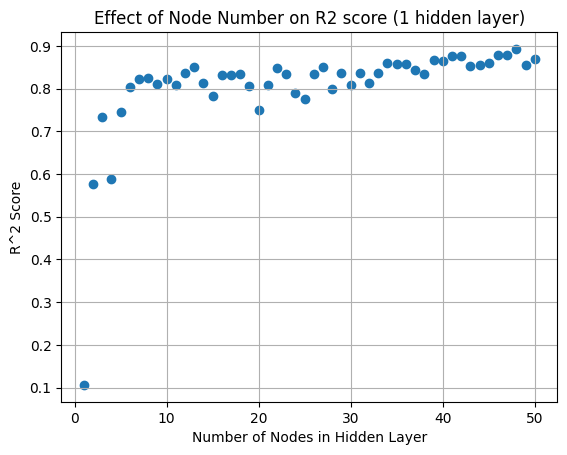

In [ ]:
# In this block we will vary the number of node in the hidden layer
num_nodes = np.arange(1,51)
score = []
for nodes in num_nodes:
  model = MLPRegressor(hidden_layer_sizes=(nodes,),random_state=20,max_iter=1000)
  model.fit(xtrain_final,ytrain_scaled)
#  ypredict = model.predict(xtrain_scaled)
  score.append(model.score(xtrain_final,ytrain_scaled))

# plot the score as a function of the number of nodes in the hidden layer

plt.scatter(num_nodes,score)
plt.title('Effect of Node Number on R2 score (1 hidden layer)')
plt.xlabel('Number of Nodes in Hidden Layer')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.show()

***HYPERPARAMETER TUNING***

**Grid Search to obtain the best set of hyperparameters for model**


Breakdown of the process taken below:

* Model Definition: Instantiate MLPRegressor with initial settings like max_iter=1000.
* Parameter Grid Setup: Define a param_grid with potential values for hyperparameters like hidden layer sizes, activation functions, solver types, alpha values, and learning rates.
* RandomizedSearchCV Initialization: Set up RandomizedSearchCV with the MLPRegressor, using the param_grid for random parameter selection, 5-fold cross-validation, all CPU cores (n_jobs=-1), and a fixed random seed for reproducibility.
* Start Timing: Record the start time for the process.
* Fit Model: Execute the fit method on the training data, which trains the MLPRegressor across different parameter combinations and evaluates using cross-validation.
* Output Results: After testing all combinations, print the best score and parameter set. Calculate and display the total time taken.
* Conclusion: The best model settings are identified, providing an optimized MLPRegressor ready for further use or evaluation.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import time

# Define the model to be tuned
model = MLPRegressor(max_iter=20000)

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,),
                           (50, 50), (100, 100),
                           (50, 50, 50), (100, 100, 100),
                           (50, 50, 50, 50), (100, 100, 100, 100),
                           (50, 50, 50, 50, 50), (100, 100, 100, 100, 100)],
    'activation': ['tanh', 'relu'],
    'random_state' : [20],
    'learning_rate_init': [0.001, 0.01, 0.1, 1],  # Correctly specifying the initial learning rates
    'alpha': [0.0001, 0.05]  # Regularization strength
}

# Initialize GridSearchCV with multiple scoring metrics
search_space_dict = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring={'r2': 'r2',
             'RMSE': 'neg_root_mean_squared_error'},
    refit='r2',
    cv=5,
    n_jobs=-1
)

# Start the timer
start_time = time.time()

# Fit GridSearchCV
fitgrid_result = search_space_dict.fit(xtrain_final, ytrain_scaled)

# Output results
print("Best Cross-validation score:%f using %s" % (fitgrid_result.best_score_, fitgrid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')
print("Best scores by metric:")
for scorer in fitgrid_result.scorer_.keys():
    print(f"{scorer}: {fitgrid_result.cv_results_['mean_test_'+scorer][fitgrid_result.best_index_]}")

from sklearn.metrics import r2_score

# Evaluate on Test Data
best_model = fitgrid_result.best_estimator_
ypredict_test = best_model.predict(xtest_final)
test_score = r2_score(ytest_scaled, ypredict_test)
print("Test score with best model: {:.5f}".format(test_score))

Best Cross-validation score:0.929224 using {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate_init': 0.01, 'random_state': 20}
Execution time: 533.0348589420319 ms
Best scores by metric:
r2: 0.9292235064477383
RMSE: -0.06791069394801368
Test score with best model: 0.87829


Now that we have found our best model and also the top performing hyperparameters, we can take a closer look at them to see if we can choose an alternative to the best performing model, that takes less time to compute, and uses less computational power.

 As long as I am consistent in using scaled values for both predictions and actual values, metrics like R² are valid.

**Extracting information for each set of hyperparameter**

In [ ]:
import numpy as np
import pandas as pd

df1 = pd.DataFrame(fitgrid_result.cv_results_)
df1 = df1.sort_values("rank_test_r2")
df1.to_csv("cv_results.csv", index = False)

from google.colab import files
files.download('cv_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Performance of unique set of hyperparameters that were carefully selected**

Top performing hyperparameter set:

In [ ]:
from sklearn.neural_network import MLPRegressor
import time

# Initialize the MLPRegressor with specified hyperparameters
modelV1 = MLPRegressor(
    activation='relu',
    alpha=0.05,
    hidden_layer_sizes=(100, 100, 100, 100, 100),
    learning_rate_init=0.01,
    random_state=20,
    max_iter=20000
)

# Start the timer before model training
start_timeV1 = time.time()

# Fit the model on the scaled training data
modelV1.fit(xtrain_final, ytrain_scaled)

# Stop the timer after model training
elapsed_timeV1 = time.time() - start_timeV1

# Predict using the scaled training data to check training performance
ypredict_trainV1 = modelV1.predict(xtrain_final)
train_scoreV1 = modelV1.score(xtrain_final, ytrain_scaled)

# Predict using the scaled test data to evaluate model performance
ypredict_testV1 = modelV1.predict(xtest_final)
#test_scoreV1 = modelV1.score(xtest_final, ytest_scaled)
test_scoreV1 = r2_score(ytest_scaled, ypredict_testV1)

# Print the results
print(f"Execution time: {elapsed_timeV1:.3f} ms")
print(f"Training R² score: {train_scoreV1}")
print(f"Test R² score: {test_scoreV1}")

Execution time: 3.463 ms
Training R² score: 0.8368226751008161
Test R² score: 0.8525969665417841


Secondmost performing hyperparameter set:

In [ ]:
from sklearn.neural_network import MLPRegressor
import time

# Initialize the MLPRegressor with specified hyperparameters
modelV3 = MLPRegressor(
    activation='relu',
    alpha=0.05,
    hidden_layer_sizes=(50, 50, 50, 50),
    learning_rate_init=0.01,
    random_state=20,
    max_iter=20000
)

# Start the timer before model training
start_timeV3 = time.time()

# Fit the model on the scaled training data
modelV3.fit(xtrain_final, ytrain_scaled)

# Stop the timer after model training
elapsed_timeV3 = time.time() - start_timeV2

# Predict using the scaled training data to check training performance
ypredict_trainV3 = modelV3.predict(xtrain_final)
train_scoreV3 = modelV3.score(xtrain_final, ytrain_scaled)

# Predict using the scaled test data to evaluate model performance
ypredict_testV3 = modelV3.predict(xtest_final)
#test_scoreV3 = modelV3.score(xtest_final, ytest_scaled)
test_scoreV3 = r2_score(ytest_scaled, ypredict_testV2)

# Print the results
print(f"Execution time: {elapsed_timeV3:.3f} ms")
print(f"Training R² score: {train_scoreV3}")
print(f"Test R² score: {test_scoreV3}")

Execution time: 621.587 ms
Training R² score: 0.9037033754434165
Test R² score: 0.8985456327721213


7th best performing hyperparameter set:

In [ ]:
from sklearn.neural_network import MLPRegressor
import time

# Initialize the MLPRegressor with specified hyperparameters
modelV2 = MLPRegressor(
    activation='relu',
    alpha=0.05,
    hidden_layer_sizes=(50, 50, 50),
    learning_rate_init=0.01,
    random_state=20,
    max_iter=20000
)

# Start the timer before model training
start_timeV2 = time.time()

# Fit the model on the scaled training data
modelV2.fit(xtrain_final, ytrain_scaled)

# Stop the timer after model training
elapsed_timeV2 = time.time() - start_timeV2

# Predict using the scaled training data to check training performance
ypredict_trainV2 = modelV2.predict(xtrain_final)
train_scoreV2 = modelV2.score(xtrain_final, ytrain_scaled)

# Predict using the scaled test data to evaluate model performance
ypredict_testV2 = modelV2.predict(xtest_final)
#test_scoreV2 = modelV2.score(xtest_final, ytest_scaled)
test_scoreV2 = r2_score(ytest_scaled, ypredict_testV2)

# Print the results
print(f"Execution time: {elapsed_timeV2:.3f} ms")
print(f"Training R² score: {train_scoreV2}")
print(f"Test R² score: {test_scoreV2}")

Execution time: 0.371 ms
Training R² score: 0.9114925583941679
Test R² score: 0.8985456327721213


**Hyperparameter Tuning - Random_State and Custom Hidden Layer Configurations**

How about we compare a few more cases in particular, alongside something else that we were not changing - random_state?

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Define the model to be tuned
model = MLPRegressor(max_iter=20000)

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50, 50, 50), (50, 50, 50), (100, 100)],
    'random_state': list(range(20, 41)),  # Random states from 20 to 30
    'activation': ['relu'],  # You can add more activation functions if needed
    'learning_rate_init': [0.01],  # Keep your previous initial learning rate, or add more to test
    'alpha': [0.05]  # Regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',  # You can use 'neg_mean_squared_error' or any other suitable metric
    refit=True,
    cv=5,  # Number of cross-validation folds
    verbose=3,  # Controls the verbosity: the higher, the more messages
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV
grid_search.fit(xtrain_final, ytrain_scaled)

# Output the best parameters and best score from the grid search
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

# Retrieve the best model
best_model = grid_search.best_estimator_

# Optionally, evaluate the best model on the test set
ypredict_test = best_model.predict(xtest_final)
test_score = best_model.score(xtest_final, ytest_scaled)
print("Test score with the best model: {:.3f}".format(test_score))


Fitting 5 folds for each of 63 candidates, totalling 315 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50, 50), 'learning_rate_init': 0.01, 'random_state': 35}
Best cross-validation score: 0.950
Test score with the best model: 0.894


We have decided to continue with the model:
modelV2 = MLPRegressor(
  activation='relu',
  alpha=0.05,
  hidden_layer_sizes=(50, 50, 50),
  learning_rate_init=0.01,
  random_state=20,
  max_iter=20000
)

which resulted in the score:
Execution time: 1.544 ms
Training R² score: 0.9114925583941679
Test R² score: 0.8985456327721213

***PERFORMANCE OF CHOSEN MODEL***

**Performance of Model on Actual (unscaled) Data**

In [ ]:
# Inverse transform the predictions and the actuals
ypredict_testV2_original = scaler_y.inverse_transform(ypredict_testV2.reshape(-1, 2))
ytest_original = scaler_y.inverse_transform(ytest_scaled)

# Calculate metrics on the original scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_mae = mean_absolute_error(ytest_original, ypredict_testV2_original, multioutput='raw_values')
test_rmse = np.sqrt(mean_squared_error(ytest_original, ypredict_testV2_original, multioutput='raw_values'))
test_r2 = r2_score(ytest_original, ypredict_testV2_original, multioutput='raw_values')

print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

Test MAE: [2.10286772 2.38300264]
Test RMSE: [3.02974892 3.46034918]
Test R²: [0.91563586 0.88145541]


Let us plot the data to better visualize it.

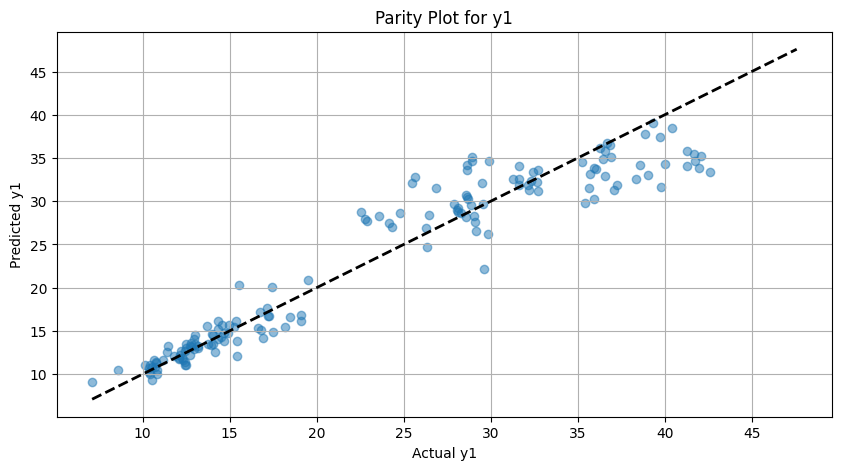

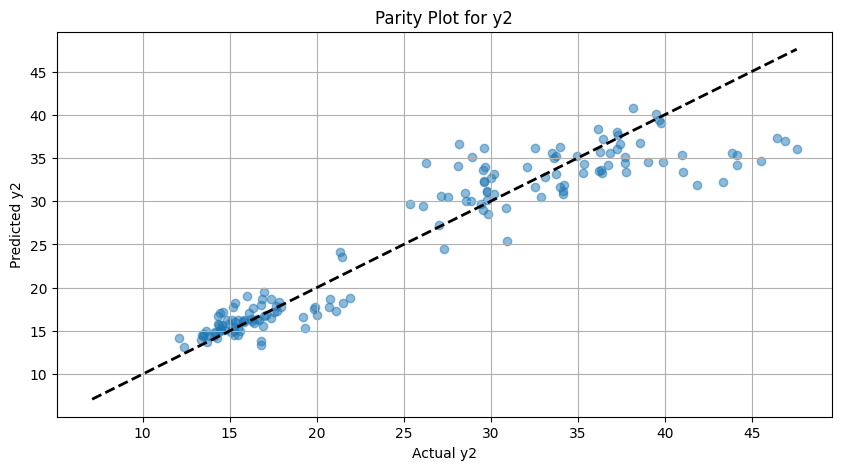

In [ ]:
import matplotlib.pyplot as plt

# Assuming ypredict_testV2_original and ytest_original are already available
# and contain predictions and actual values on the original scale for y1 and y2.

# Plotting the results for y1
plt.figure(figsize=(10, 5))
plt.scatter(ytest_original[:, 0], ypredict_testV2_original[:, 0], alpha=0.5)
plt.plot([ytest_original.min(), ytest_original.max()], [ytest_original.min(), ytest_original.max()], 'k--', lw=2)  # Diagonal line
plt.title('Parity Plot for y1')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.grid(True)
plt.show()

# Plotting the results for y2
plt.figure(figsize=(10, 5))
plt.scatter(ytest_original[:, 1], ypredict_testV2_original[:, 1], alpha=0.5)
plt.plot([ytest_original.min(), ytest_original.max()], [ytest_original.min(), ytest_original.max()], 'k--', lw=2)  # Diagonal line
plt.title('Parity Plot for y2')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.grid(True)
plt.show()


The variance in prediction accuracy seems to increase with higher values for both y1 and y2.

* The model seems to perform well for lower to mid-range values but less so at higher ranges.
* The actual-predicted value pairs are consistently above the line at the high end of the scale, which suggests that the model systematically underpredicts larger values.

**Observing Residuals**

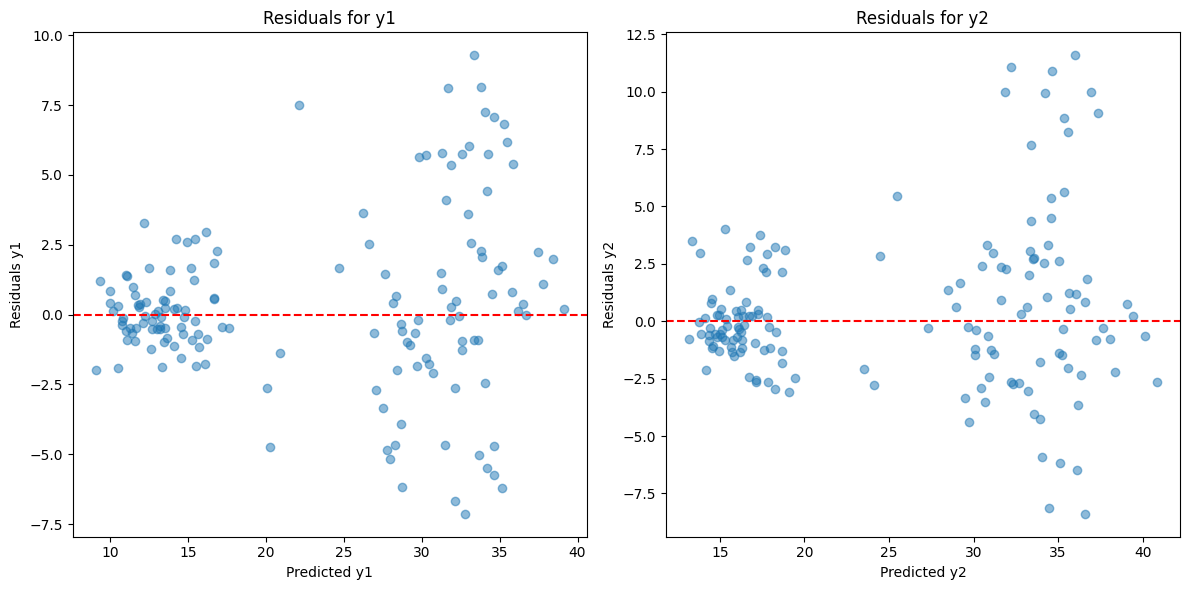

In [ ]:
# Calculate residuals
residuals = ytest_original - ypredict_testV2_original

# Plotting the residuals for each target
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(ypredict_testV2_original[:, 0], residuals[:, 0], alpha=0.5)
plt.title('Residuals for y1')
plt.xlabel('Predicted y1')
plt.ylabel('Residuals y1')
plt.axhline(0, color='red', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(ypredict_testV2_original[:, 1], residuals[:, 1], alpha=0.5)
plt.title('Residuals for y2')
plt.xlabel('Predicted y2')
plt.ylabel('Residuals y2')
plt.axhline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

For both y1 and y2, the residuals are scattered around the zero line, which is generally good. It indicates that the model doesn’t have a systematic error that consistently overpredicts or underpredicts.

Ideally, the variance of the residuals should be constant across all levels of predictions. In both plots, there appears to be a spread that increases with the magnitude of the predicted value, particularly for y2. This pattern might suggest heteroscedasticity, meaning that the model's performance varies across the range of output values.

Looking at the initial distribution histogram for y2, it can be observed that the amount of data for those higher ranges, is lacking. This can explain the model less accurately predicting labels at higher ranges.

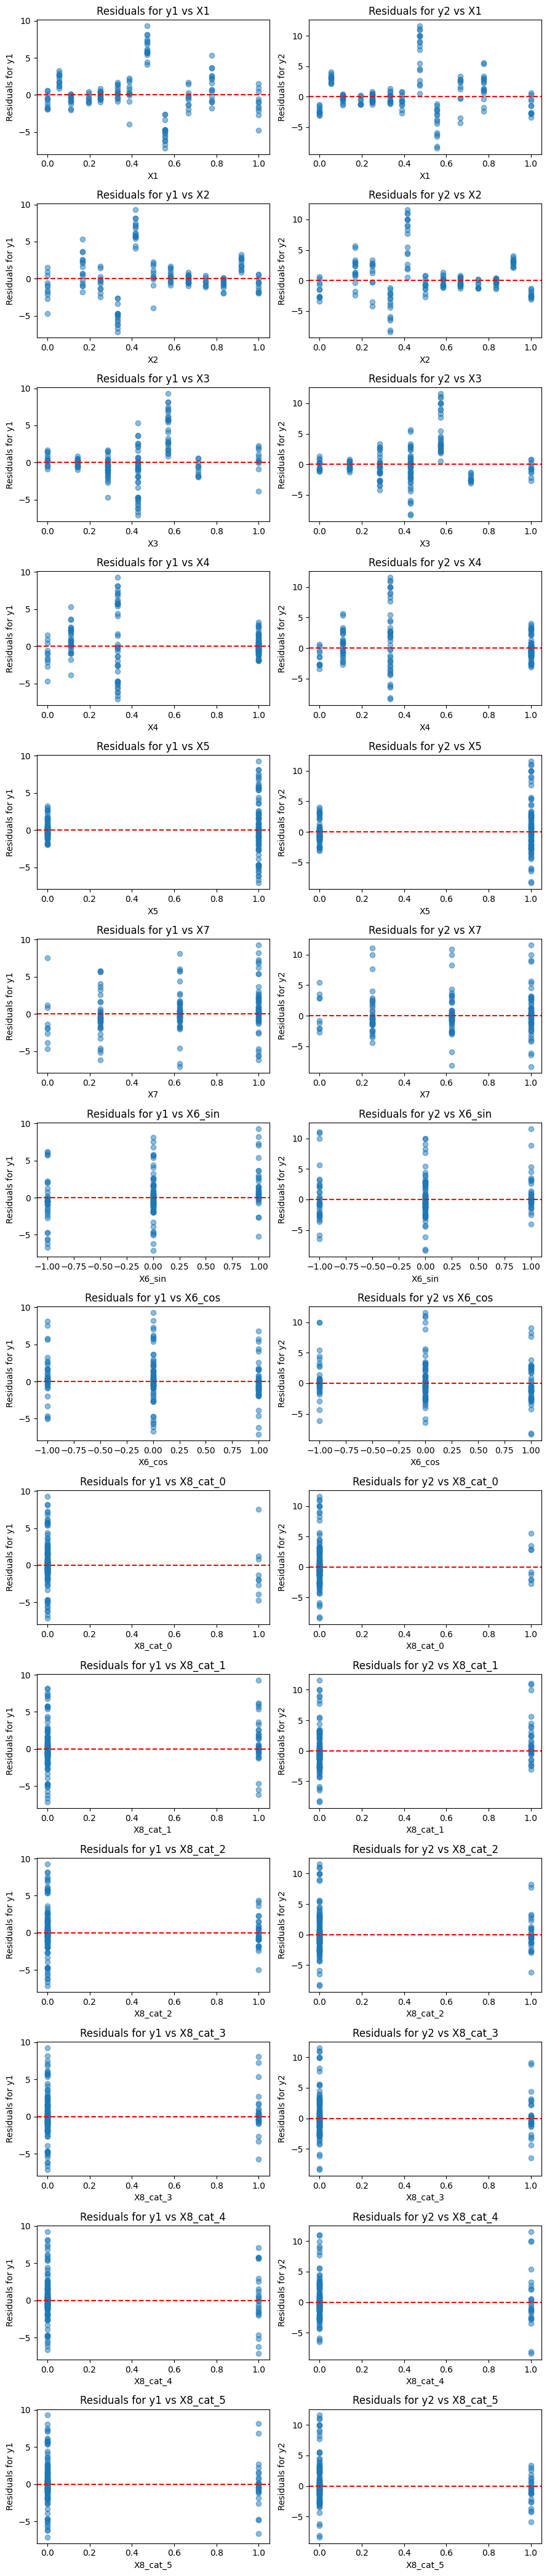

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals_y1 = ytest_original[:, 0] - ypredict_testV2_original[:, 0]
residuals_y2 = ytest_original[:, 1] - ypredict_testV2_original[:, 1]

# Assuming xtest_final_df is your test dataset in DataFrame format with named columns
features = xtest_final_df.columns

# Create a figure with subplots
fig, axs = plt.subplots(len(features), 2, figsize=(9, 3 * len(features)))

for i, feature in enumerate(features):
    # Plotting residuals for y1 against each feature
    axs[i, 0].scatter(xtest_final_df[feature], residuals_y1, alpha=0.5)
    axs[i, 0].set_title(f'Residuals for y1 vs {feature}')
    axs[i, 0].set_xlabel(feature)
    axs[i, 0].set_ylabel('Residuals for y1')
    axs[i, 0].axhline(0, color='red', linestyle='--')

    # Plotting residuals for y2 against each feature
    axs[i, 1].scatter(xtest_final_df[feature], residuals_y2, alpha=0.5)
    axs[i, 1].set_title(f'Residuals for y2 vs {feature}')
    axs[i, 1].set_xlabel(feature)
    axs[i, 1].set_ylabel('Residuals for y2')
    axs[i, 1].axhline(0, color='red', linestyle='--')

# Adjust layout for better viewing
plt.tight_layout()
plt.show()


Residual analysis is a fundamental part of model diagnostics. It helps identify patterns that the model might not be capturing. If the residuals display any systematic pattern when plotted against features, it suggests that the model is missing some aspect of the information conveyed by those features.

In most plots, the residuals are spread around the horizontal line at zero, without any clear pattern. This indicates that there are no obvious systematic errors in how the model is predicting these particular features.

A few plots show a slight funnel shape, where residuals become more dispersed as feature values increase or decrease. This could indicate heteroscedasticity, meaning the model's errors are not consistent across all values of the features.

***FEATURE IMPORTANCE***

**Grid Search to obtain the best set of hyperparameters for model**

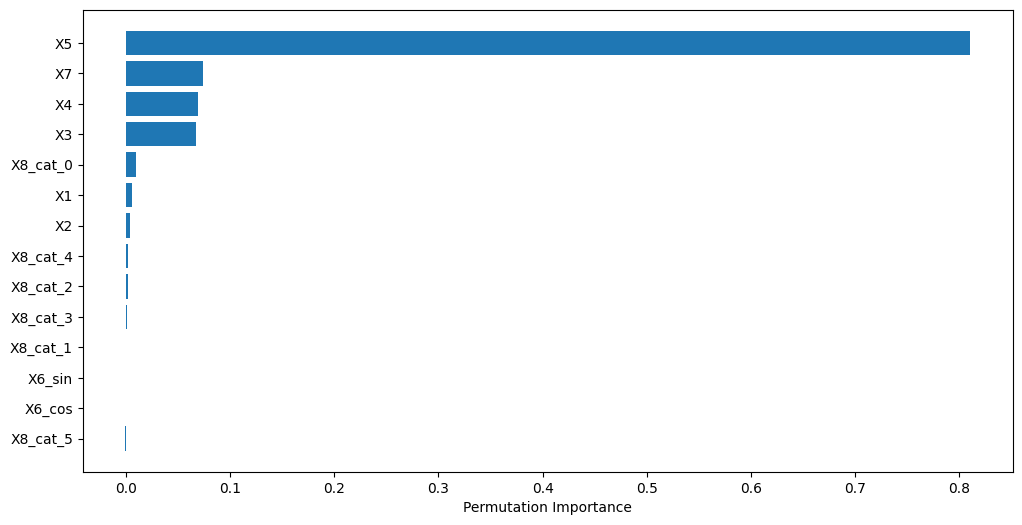

In [ ]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(modelV2, xtest_final, ytest_scaled, n_repeats=10, random_state=0, n_jobs=-1)

# Get the importance scores and sort them
sorted_idx = perm_importance.importances_mean.argsort()

# Visualize the feature importance
plt.figure(figsize=(12, 6))
plt.barh(range(xtest_final.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(xtest_final.shape[1]), xtest_final_df.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
import time

# Define the model to be tuned
model = MLPRegressor(max_iter=20000)

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,),
                           (50, 50), (100, 100),
                           (50, 50, 50), (100, 100, 100),
                           (50, 50, 50, 50), (100, 100, 100, 100),
                           (50, 50, 50, 50, 50), (100, 100, 100, 100, 100)],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1, 1],  # Correctly specifying the initial learning rates
    'alpha': [0.0001, 0.05]  # Regularization strength
}

# Initialize RandomizedSearchCV with multiple scoring metrics
search_space_dict = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring={'r2': 'r2',
             'RMSE': 'neg_root_mean_squared_error'},
    refit='r2',
    cv=5,
    n_jobs=-1,
    random_state=20
)

# Start the timer
start_time = time.time()

# Fit RandomizedSearchCV
random_result = search_space_dict.fit(xtrain_final, ytrain_scaled)

# Output results
print("Best Cross-validation score:%f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')
print("Best scores by metric:")
for scorer in random_result.scorer_.keys():
    print(f"{scorer}: {random_result.cv_results_['mean_test_'+scorer][random_result.best_index_]}")

from sklearn.metrics import r2_score

# Evaluate on Test Data
best_model = search_space_dict.best_estimator_
ypredict_test = best_model.predict(xtest_final)
test_score = r2_score(ytest_scaled, ypredict_test)
print("Test score with best model: {:.5f}".format(test_score))

Best Cross-validation score:0.907579 using {'learning_rate_init': 0.01, 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.05, 'activation': 'tanh'}
Execution time: 33.631041049957275 ms
Best scores by metric:
r2: 0.9075789894183195
RMSE: -0.0781649225701144
Test score with best model: 0.89030


In [ ]:
import numpy as np
import pandas as pd

df2 = pd.DataFrame(random_result.cv_results_)
df2 = df2.sort_values("rank_test_r2")
df2.to_csv("cv_randomresults.csv", index = False)

from google.colab import files
files.download('cv_randomresults.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We didn't continue with using Randomized Search as we believe that it was giving r2-scores that weren't upto par with the r2-scores that were obtained from the more robust Grid Search.